# Data Challenge 6

Yanruyu Zhu(yaz4004)

### Exploring data and data cleaning

In [1]:
from IPython.display import HTML
HTML('''
<script src='//code.jquery.com/jquery-3.3.1.min.js'></script>
<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
$('div .jp-CodeCell .jp-Cell-inputWrapper').hide();
} else {
$('div.input').show();
$('div .jp-CodeCell .jp-Cell-inputWrapper').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="Code on/off"></form>''')

In [133]:
# import required libarary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 #### Drop columns that are not relevant to the problem.

In [134]:

# listing = pd.read_csv('listings.csv')
listing = pd.read_csv('NYC.csv')
objects = listing.select_dtypes(include=['object']).columns
drop_object = ['name',
               'host_verifications',
               'description',
             'listing_url',
             'last_scraped',
             'picture_url',
             'host_url',
             'host_name',
             'host_since',
             'host_location',
             'host_about',
             'host_thumbnail_url',
             'host_picture_url',
             'host_neighbourhood',
             'neighbourhood',
             'calendar_last_scraped',
             'first_review',
             'last_review',
              'bathrooms_text',
              'amenities']
floats = listing.select_dtypes(include=['float64']).columns
drop_float = ['minimum_nights_avg_ntm',
              'maximum_nights_avg_ntm']
ints = listing.select_dtypes(include=['int64']).columns
drop_int = ['scrape_id',
            'host_id']
drop_cols = drop_object + drop_float + drop_int
print("Shape of the dataset before dropping: ", listing.shape)
print("Dropping {} columns".format(len(drop_cols)))
listing = listing.drop(columns = drop_cols)
print("Shape of the dataset after dropping: ", listing.shape)

# nyc = pd.read_csv('NYC.csv')
# nyc.iloc[0,:]

Shape of the dataset before dropping:  (44666, 74)
Dropping 24 columns
Shape of the dataset after dropping:  (44666, 50)


#### Drop columns which have more than 20% missing data

In [135]:
def missing_statistics(df):
    missing_stats = df.isnull().sum().to_frame()
    missing_stats.columns = ['num_missing']
    missing_stats['percent_missing'] = np.round(100 * (missing_stats['num_missing'] / df.shape[0]))
    missing_stats.sort_values(by='num_missing', ascending=False, inplace=True)
    return missing_stats
num_missing = missing_statistics(listing)
num_missing
drop_cols = list(num_missing[num_missing.percent_missing > 20].index)
print("Shape of the dataset before dropping: ", listing.shape)
print("Dropping {} columns".format(len(drop_cols)))
listing = listing.drop(columns = drop_cols)
print("Shape of the dataset after dropping: ", listing.shape)


Shape of the dataset before dropping:  (44666, 50)
Dropping 15 columns
Shape of the dataset after dropping:  (44666, 35)


#### Convert object types to categorical and boolean variables

In [136]:
categorical_types = ['host_is_superhost',
                     'host_has_profile_pic',
                     'host_identity_verified',
                     'property_type',
                     'room_type',
                     'has_availability',
                     'instant_bookable',]
                     
# listing[categorical_types].dtypes
listing[categorical_types] = listing[categorical_types].apply(lambda x: x.astype('category'),axis='rows')
listing[categorical_types].dtypes

host_is_superhost         category
host_has_profile_pic      category
host_identity_verified    category
property_type             category
room_type                 category
has_availability          category
instant_bookable          category
dtype: object

#### Subseting the categorical values

host_is_superhost          2
host_has_profile_pic       2
host_identity_verified     2
property_type             84
room_type                  4
has_availability           2
instant_bookable           2
dtype: int64


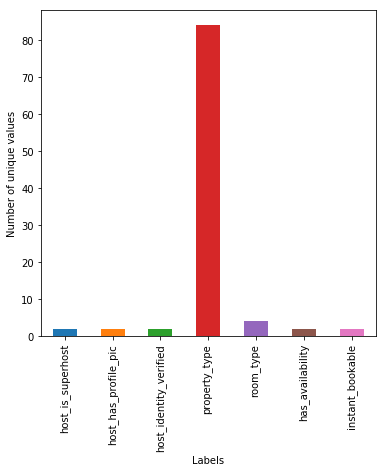

In [137]:
num_unique_values = listing[categorical_types].apply(pd.Series.nunique, axis='rows')
print(num_unique_values)
# Plot number of unique values for each label
num_unique_values.plot(kind='bar',figsize = [6,6])
# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')
# Display the plot
plt.show()

In [138]:
listing = listing[listing.property_type.isin(['Entire apartment', 'Private room in apartment', 'Private room in house', 'Private room in townhouse','Entire house','Entire condominium'])]
listing = listing.copy()
listing.loc[:, 'property_type'] = listing.loc[:,'property_type'].cat.remove_unused_categories()
listing.property_type.value_counts()

Entire apartment             18579
Private room in apartment    15347
Private room in house         2247
Private room in townhouse     1073
Entire house                  1065
Entire condominium            1028
Name: property_type, dtype: int64

In [139]:
print('The size of the dataframe now:', listing.shape)
missing_df = missing_statistics(listing)
missing_df

The size of the dataframe now: (39339, 35)


,num_missing,percent_missing
bedrooms,3696,9.0
beds,427,1.0
host_listings_count,14,0.0
host_total_listings_count,14,0.0
host_has_profile_pic,14,0.0
host_identity_verified,14,0.0
host_is_superhost,14,0.0
id,0,0.0
availability_30,0,0.0
availability_60,0,0.0


Check if the 17 missing values of host columns are are missing together

In [140]:
cols_missing_values = list(missing_df[missing_df.num_missing > 0].index)
df_airbnb_missing_values = listing[cols_missing_values]
host_cols = list(df_airbnb_missing_values.columns[df_airbnb_missing_values.columns.str.contains('host')])
df_airbnb_missing_values[host_cols][df_airbnb_missing_values.host_identity_verified.isnull()]

,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,host_is_superhost
4849,NaN,NaN,NaN,NaN,NaN
5258,NaN,NaN,NaN,NaN,NaN
6591,NaN,NaN,NaN,NaN,NaN
7306,NaN,NaN,NaN,NaN,NaN
7860,NaN,NaN,NaN,NaN,NaN
15409,NaN,NaN,NaN,NaN,NaN
22646,NaN,NaN,NaN,NaN,NaN
22716,NaN,NaN,NaN,NaN,NaN
24240,NaN,NaN,NaN,NaN,NaN
24551,NaN,NaN,NaN,NaN,NaN


As shown above, the host columns have missing values for the same observations.

#### Dealing with Null values

In [141]:
from sklearn.impute import SimpleImputer

missing_cols = ['host_is_superhost','host_listings_count','host_total_listings_count','host_has_profile_pic',
                'host_identity_verified','bedrooms','beds']
listing.isna().sum()

def replace_missing_values(cols, df):
    for col in cols:
        if type(df[col].dtype) is pd.core.dtypes.dtypes.CategoricalDtype:
            print("Filling {} null values with most frequent value".format(col))
            mode_imputer = SimpleImputer(strategy='most_frequent')
            df.loc[:, col] = mode_imputer.fit_transform(df[[col]])
        elif df[col].dtype == 'float64' or df[col].dtype == 'int64':
            print("Filling {} null values with median value".format(col))
            median_imputer = SimpleImputer(strategy='median')
            df.loc[:, col] = median_imputer.fit_transform(df[[col]])
        else:
            raise ValueError("Invalid column type")
    return df

listing_full = replace_missing_values(missing_cols, listing)
listing_full.isna().sum()

Filling host_is_superhost null values with most frequent value
Filling host_listings_count null values with median value
Filling host_total_listings_count null values with median value
Filling host_has_profile_pic null values with most frequent value
Filling host_identity_verified null values with most frequent value
Filling bedrooms null values with median value
Filling beds null values with median value


id                                              0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0


As shown above, there is no missing values in the dataset

#### Clean speical columns  

The price column contains a special dollar symble in it. Delete the special symble

In [142]:
import re
listing_full['price'] = listing_full.price.apply(lambda x:re.sub(r'[$,]', '', x)).astype('float64')
listing_full['price'].head()

0    175.0
2     60.0
3    175.0
4     73.0
5     75.0
Name: price, dtype: float64

#### One-hot encoding for categorical variables

In [143]:
cate = ['host_is_superhost','host_has_profile_pic','host_identity_verified','neighbourhood_cleansed','neighbourhood_group_cleansed',]
category_one_hot_encoding = pd.get_dummies(listing_full[cate])
# listing_full.head()
listing_full = pd.concat([listing_full, category_one_hot_encoding],
                            axis='columns').drop(cate,
                                                 axis='columns')

## PCA Analysis

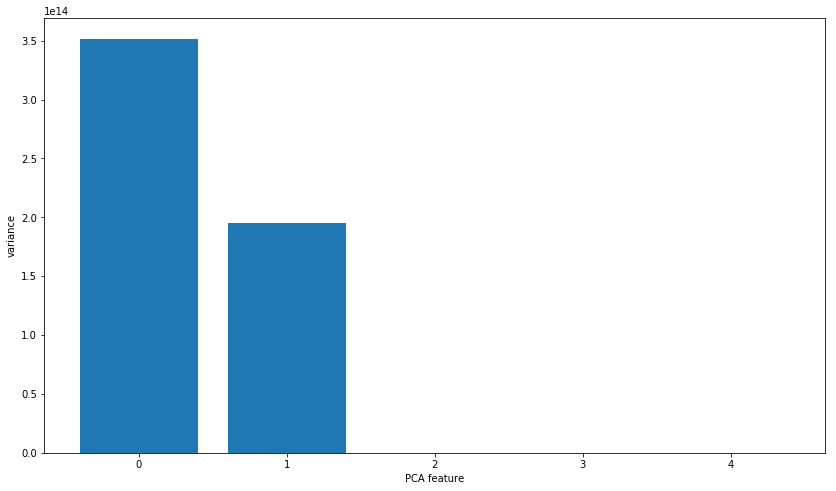

In [154]:
from sklearn.decomposition import PCA
listing_pca = listing_full.select_dtypes(include=['float64','int64','uint8'])
pca = PCA(n_components=5)
pca.fit(listing_pca)
PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
features = range(pca.n_components_)
plt.figure(figsize=(14,8))
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [156]:
pca_features = pca.transform(listing_pca)
pca_features.shape

(39339, 5)

In [157]:
pca_df = pd.DataFrame(pca_features)
pca_df.head()

,0,1,2,3,4
0,134460.150419,-2.277836e+07,32.621493,40.917532,146.842609
1,133750.519925,-2.277584e+07,31.627920,-90.067538,-19.311079
2,134434.493647,-2.277581e+07,34.188631,40.506819,137.741094
3,132509.859217,-2.277579e+07,10.453923,-63.285123,149.657699
4,132509.606802,-2.277577e+07,30.014955,-76.363248,-31.154717


#### Fit K-means for K=1...10 clusters and use Elbow Method

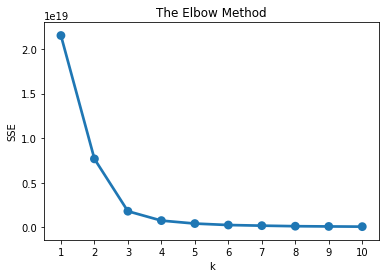

In [158]:
from sklearn.cluster import KMeans
import seaborn as sns

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(pca_df)
    sse[k] = kmeans.inertia_
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()    

Using K=3

In [163]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(pca_df)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)
# get the labels
cluster_labels = kmeans.labels_

# assign these clusters back into the dataframe
pca_df_k3 = pca_df.assign(cluster=cluster_labels)

# display the shape
pca_df_k3.shape
pca_df_k3.cluster.value_counts()

1    21698
0    17640
2        1
Name: cluster, dtype: int64

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [168]:
listing = pd.read_csv('NYC.csv')

In [169]:
listing.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                               